In [6]:
from datenguidepy.query_builder import Query
from datenguidepy.query_helper import get_all_regions,get_statistics

from IPython.display import display, Markdown, HTML

In [7]:
import panel as pn
from panel.interact import interact
pn.extension()

In [8]:
import pandas as pd

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Statistics Dashboard

In [10]:
# this is the actual datenguidepy function
# but due to current issues with the API we load the meta
# data statically from a .csv file instead
# statistics = get_statistics() 

statistics = pd.read_csv('descriptions.csv')

In [11]:
statistics.head()

,stat_name,stat_description,stat_description_full
0,AENW01,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
1,AENW02,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *au...
2,AENW03,Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerlege.),**Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerleg...
3,AENW04,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
4,AENW05,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *au...


In [12]:
def get_berlin_stat(statistic):
    q = Query.region("11")
    q.add_field(statistic)
    descr = statistics.query("stat_name == @statistic").iloc[0,2]
    return Markdown(q.results(verbose_statistics = True).to_html() + descr)



In [13]:
interact(get_berlin_stat,statistic=statistics.set_index('stat_description')['stat_name'].to_dict())

Column
    [0] Column
        [0] Select(name='statistic', options={'Entsorgte/behandelte Abf...}, value='AENW04')
    [1] Row
        [0] Markdown(Markdown, name='interactive00007')

## Regional Comparison Voting participation example

In [14]:
regions = get_all_regions()
regions.head()

,name,level,parent
id,,,
10,Saarland,nuts1,DG
11,Berlin,nuts1,DG
12,Brandenburg,nuts1,DG
13,Mecklenburg-Vorpommern,nuts1,DG
14,Sachsen,nuts1,DG


In [15]:
states = regions.query('level == "nuts1"')

In [16]:
voting_query = Query.region(list(states.index))
voting_participation = voting_query.add_field("WAHLSR")
voting_participation_result = voting_query.results()
voting_participation_result.head()

,id,name,year,WAHLSR,WAHLSR_source_title_de,WAHLSR_source_valid_from,WAHLSR_source_periodicity,WAHLSR_source_name,WAHLSR_source_url
0,10,Saarland,1994,83.5,Allgemeine Bundestagswahlstatistik,1994-01-01T00:00:00,VIERJAEHRLICH,14111,None
1,10,Saarland,1994,74.1,Allgemeine Europawahlstatistik,1994-01-01T00:00:00,FUENFJAEHRLICH,14211,None
2,10,Saarland,1994,83.5,Landtagswahlen: Saarland,1994-01-01T00:00:00,FUENFJAEHRLICH,14340,None
3,10,Saarland,1998,84.8,Allgemeine Bundestagswahlstatistik,1994-01-01T00:00:00,VIERJAEHRLICH,14111,None
4,10,Saarland,1999,60.5,Allgemeine Europawahlstatistik,1994-01-01T00:00:00,FUENFJAEHRLICH,14211,None


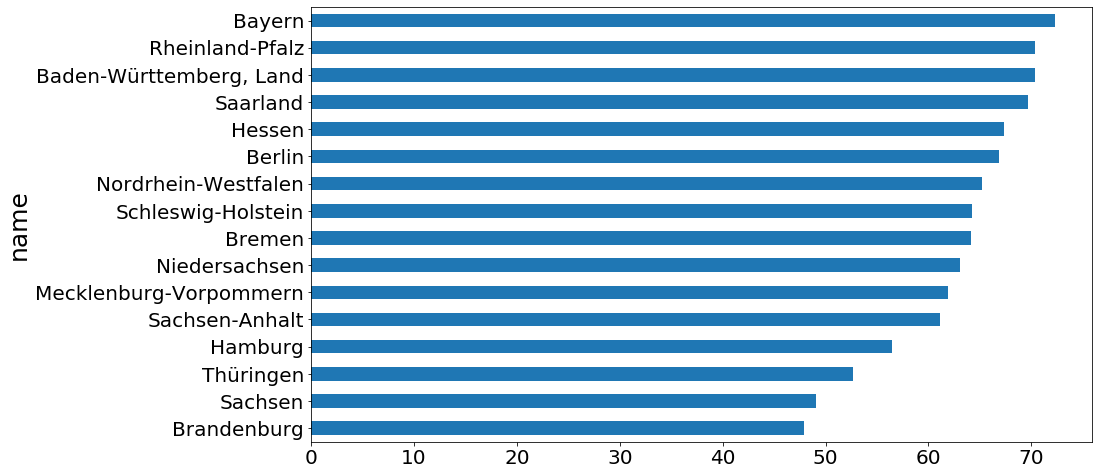

In [17]:
(voting_participation_result
 .query('WAHLSR_source_title_de.str.contains("Landtag")')
 .groupby('name')
 .last()
 .sort_values('WAHLSR')
 .loc[:,'WAHLSR']
 .plot.barh(figsize=(14,8),fontsize=20)
)

## Time Series Example Domestic Animals

In [18]:
animal_query = Query.region("11")
statistic = animal_query.add_field("TIE001")
statistic.add_args({"TIERA8":"ALL"})
statistic.add_field("TIERA8")
animal_results = animal_query.results(verbose_statistics=False,verbose_enums=True)
animal_results.head()

,id,name,year,TIERA8,TIE001,TIE001_source_title_de,TIE001_source_valid_from,TIE001_source_periodicity,TIE001_source_name,TIE001_source_url
0,11,Berlin,1999,Milchkühe,126,Allgemeine Agrarstrukturerhebung (bis 2007),1999-05-31T00:00:00,ZWEIJAEHRLICH,41120,None
1,11,Berlin,1999,Rinder,453,Allgemeine Agrarstrukturerhebung (bis 2007),1999-05-31T00:00:00,ZWEIJAEHRLICH,41120,None
2,11,Berlin,1999,Mastschweine über 50 kg,178,Allgemeine Agrarstrukturerhebung (bis 2007),1999-05-31T00:00:00,ZWEIJAEHRLICH,41120,None
3,11,Berlin,1999,Zuchtsauen,5,Allgemeine Agrarstrukturerhebung (bis 2007),1999-05-31T00:00:00,ZWEIJAEHRLICH,41120,None
4,11,Berlin,1999,Schweine,287,Allgemeine Agrarstrukturerhebung (bis 2007),1999-05-31T00:00:00,ZWEIJAEHRLICH,41120,None


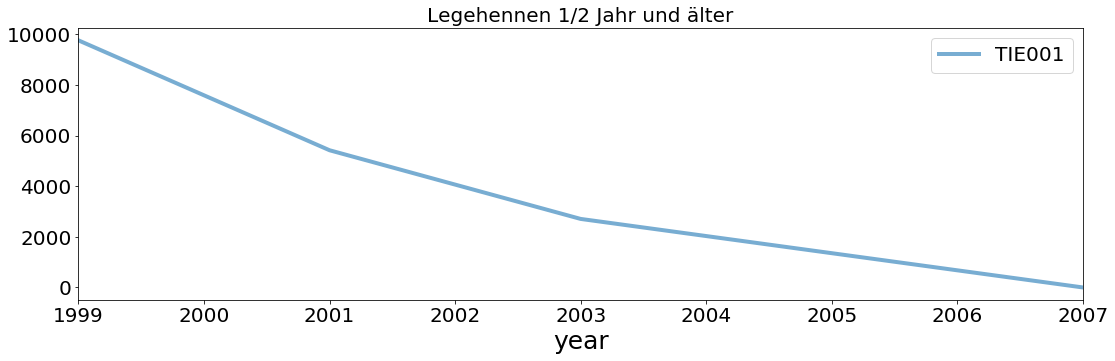

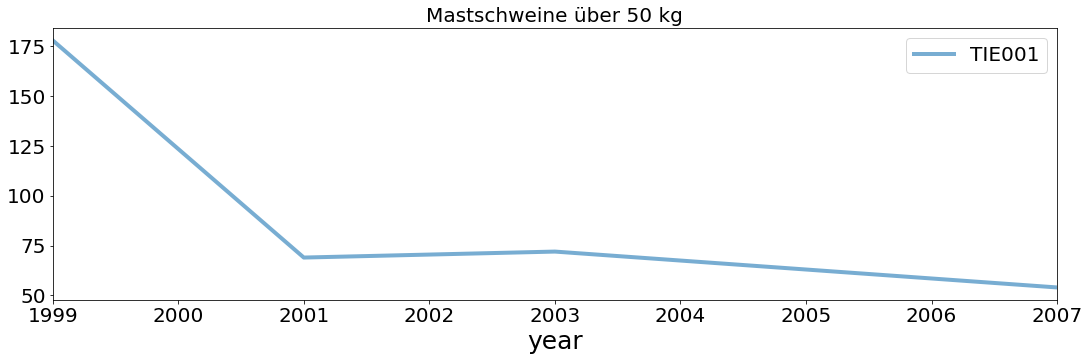

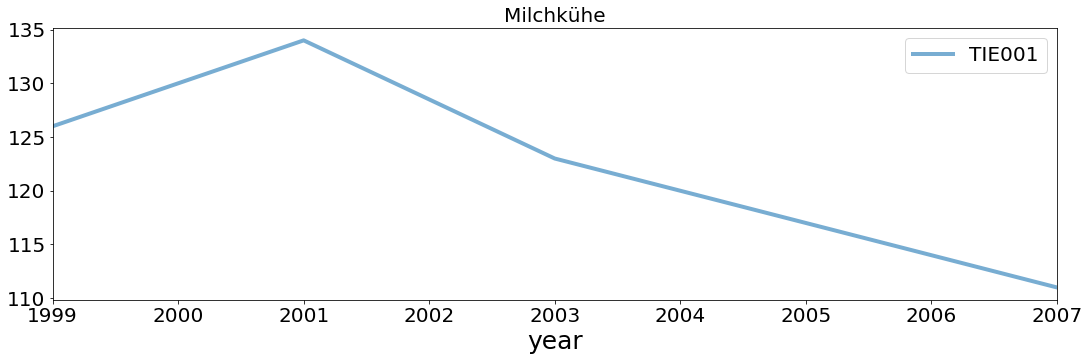

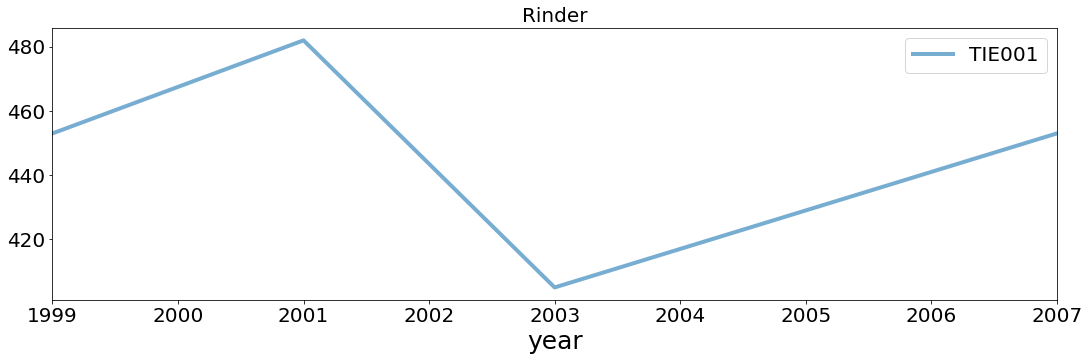

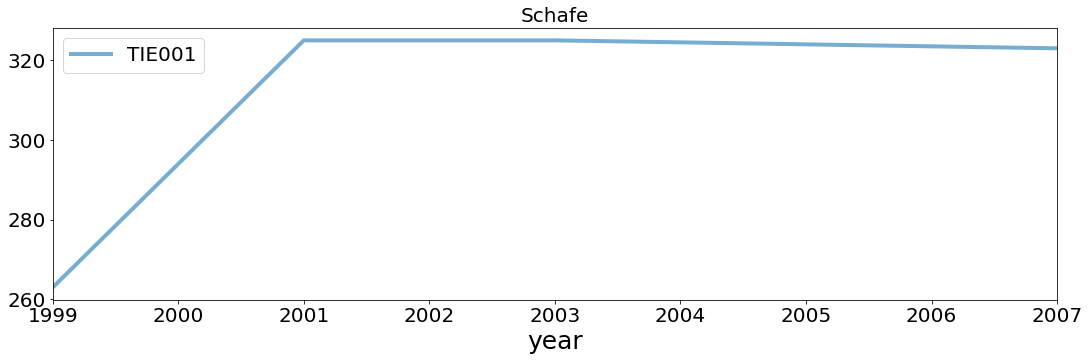

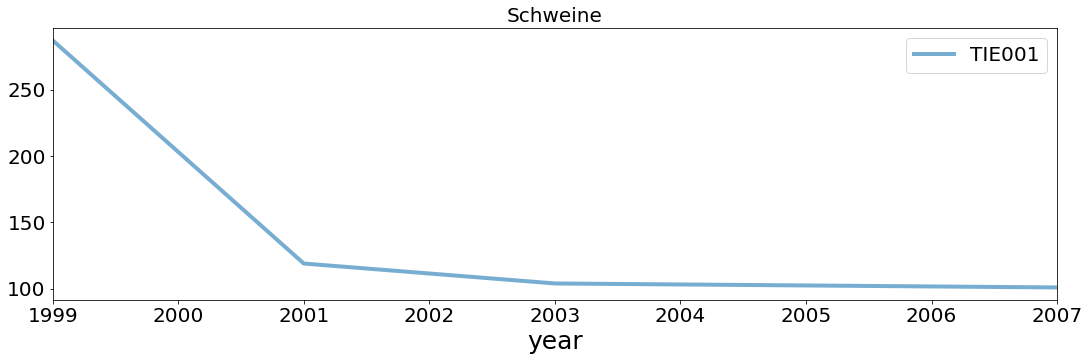

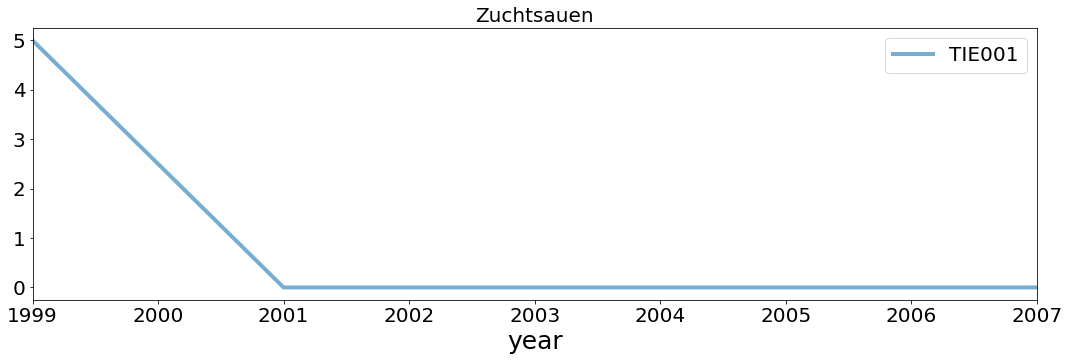

In [19]:
for animal,data in animal_results.groupby('TIERA8'):
    data.plot('year','TIE001',title=animal,figsize=(18,5),lw=4,alpha=0.6,fontsize=20)

## Meta Analysis of data availability

In [27]:
%%time
s = get_statistics()

def all_region_stats(region_id):
    region_statistics = {}
    for stat in s.statistics:
        q = Query.region(region_id)
        q.add_field(stat)
        r = q.results(verbose_statistics = True)
        if not r.empty:
            region_statistics[stat] = r
    return region_statistics

stats = {}
stats['germany_stats'] = all_region_stats('DG')

CPU times: user 18.4 s, sys: 400 ms, total: 18.8 s
Wall time: 1min 57s


In [ ]:
stats['berlin-state_stats'] = all_region_stats('11')

In [ ]:
# stats["berlin_tempelhof_schoeneberg_stats"] = all_region_stats('11007')

In [ ]:
stats["berlin_city_stats"] = all_region_stats('11000000')

In [ ]:
for reg,all_stats in stats.items():
    print(f"{reg} has {len(all_stats)} non-empty statistics")

## Find interesting statistics

In [20]:
from datenguidepy.query_helper import get_statistics
# all_statistics = get_statistics()
all_statistics = pd.read_csv('descriptions.csv')
all_statistics.head()

,stat_name,stat_description,stat_description_full
0,AENW01,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
1,AENW02,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *au...
2,AENW03,Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerlege.),**Entsorg.u.Behandlungsanl.(o.Sortier.u.Zerleg...
3,AENW04,Entsorgte/behandelte Abfallmenge a.d. eig. BL,**Entsorgte/behandelte Abfallmenge a.d. eig. B...
4,AENW05,Abgelagerte Abfallmenge in Deponien,**Abgelagerte Abfallmenge in Deponien**\n *au...


Use full text search to find interesting Statistics

In [21]:
# find all water statistics
all_statistics.query('stat_description.str.contains("wasser",case=False)')

,stat_name,stat_description,stat_description_full
153,AI1908,Wasserabgabe je Einwohner und Tag (in Liter),**Wasserabgabe je Einwohner und Tag (in Liter)...
417,TRM001,Trockenmasse a.Abwasserbeh.-anl.dir.ents.Klärs...,**Trockenmasse a.Abwasserbeh.-anl.dir.ents.Klä...
418,TWA501,Entgelt für die Trinkwasserversorgung privater...,**Entgelt für die Trinkwasserversorgung privat...
444,WAS001,Wasseraufkommen,**Wasseraufkommen**\n *aus GENESIS-Statistik ...
445,WAS002,Wasserversorgungsunternehmen,**Wasserversorgungsunternehmen**\n*aus GENESIS...
446,WAS003,Wassergewinnungsanlagen,**Wassergewinnungsanlagen**\n*aus GENESIS-Stat...
447,WAS004,Wassergewinnung,**Wassergewinnung**\n *aus GENESIS-Statistik ...
448,WAS005,Einw. m. Anschl. an d. öffentl. Wasserversorgung,**Einw. m. Anschl. an d. öffentl. Wasserversor...
449,WAS006,Hausbrunnen oder Quellen mit Trinkwassergewinnung,**Hausbrunnen oder Quellen mit Trinkwassergewi...
450,WAS007,Wasserabgabe an Letztverbraucher,**Wasserabgabe an Letztverbraucher**\n *aus G...


In [22]:
# look at full description for interesting statistics
Markdown(all_statistics.query("stat_name == 'TWA501'").iloc[0,2])

**Entgelt für die Trinkwasserversorgung privater Haushalte**
  *aus GENESIS-Statistik "Erhebung der Wasser- und Abwasserentgelte" 32271)*
  Entgelt für die Trinkwasserversorgung privater Haushalte


In den Fällen, in denen pro Gemeinde mehrere Unternehmen mit unterschiedlichen Entgelten tätig sind, wird ein gewichtetes Durchschnittsentgelt auf Gemeindeebene berechnet. Dabei werden die Entgelte mit der Anzahl der angeschlossenen Einwohner gewichtet. Oberhalb der Gemeindeebene wird das Durchschnittsentgelt als gewichtetes Mittel auf der Grundlage der Einwohnerzahl insgesamt ermittelt. Bei der Gewichtung werden generell alle Einwohner einbezogen, d.h. auch die Einwohner, die kein verbrauchsabhängiges bzw. -unabhängiges Entgelt bezahlen. Es handelt sich um Brutto-Angaben.

## Find relevant regions

In [23]:
all_regions = get_all_regions()
all_regions.head()

,name,level,parent
id,,,
10,Saarland,nuts1,DG
11,Berlin,nuts1,DG
12,Brandenburg,nuts1,DG
13,Mecklenburg-Vorpommern,nuts1,DG
14,Sachsen,nuts1,DG


In [24]:
all_regions.query('name.str.contains("karlsruhe",case=False)')

,name,level,parent
id,,,
082,Karlsruhe,nuts2,08
08212,Karlsruhe,nuts3,082
08215,Karlsruhe,nuts3,082
08212000,Karlsruhe,lau,08212
